#### Loading dataset

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
#shape of each dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Validating Data

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

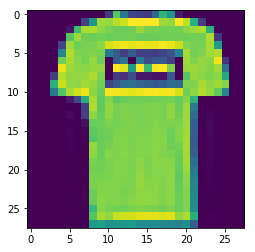

In [14]:
# showing x_train[0] as image
import matplotlib.pyplot as plt

my_image=x_train[1]
img = plt.imshow(my_image)

In [ ]:
# check with correspoding image number
#0-T-shirt/top, 1-Trouser, 2-Pullover, 3-Dress, 4-Coat, 5-Sandal, 6-Shirt, 7-Sneaker, 8-Bag, 9-Ankle boot
print(y_train[0])

#### Converting data for neural networks

In [ ]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train = x_train/255

# Prepare the test images
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test = x_test/255

In [ ]:
#Convert the lables into a set of 10 numbers to input into the neural network (converting to categorical)
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#print the new labels in the training dataset
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

In [ ]:
#print an example of the new labels 
print('the one hot label is:', y_train_one_hot[0])  #Earlier 9 converted to [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

#### Builing the Convolution Neural Network model

In [ ]:
#Create the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D

model = Sequential()

In [ ]:
#Convolution Layer-1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
#Maxpooling layer-1
model.add(MaxPooling2D(pool_size=(2,2)))  #image will become 14x14
model.add(Dropout(0.2))

#Convolution Layer-2
#model.add(Conv2D(64, (3,3), activation='relu'))
#Maxpooling layer-2
#model.add(MaxPooling2D(pool_size=(2,2))) #image will become 7x7
#model.add(Dropout(0.2))

#Flatten layer
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

In [ ]:
#Get the model accuracy
model.evaluate(x_test, y_test_one_hot)[1]  #0.8974 means accuracy is 89.74%

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#Model to predict the results
import numpy as np
pred_y=model.predict(x_test)
print(pred_y.shape)

print(pred_y[1])   #before argmax

y_pred=[]
import numpy as np
for i in range(len(pred_y)):
    y_pred.append(np.argmax(pred_y[i]))
    
print(y_pred[1])  #after argmax

In [ ]:
for i in range(10):
    print(y_pred[i], y_test[i])